<a href="https://colab.research.google.com/github/coding-dojo-data-science/Project1_Exemplar/blob/main/DS_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Salary Insights

Sherlin Whaley

# Project 1 - Parts 1 & 2

Part 1:

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

Part 2: 

We will continue to work off of the GitHub repository we created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it.  As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link in the learn platform.
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!
  - Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

Link to the original dataset on Kaggle

https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

### Data Dictionary

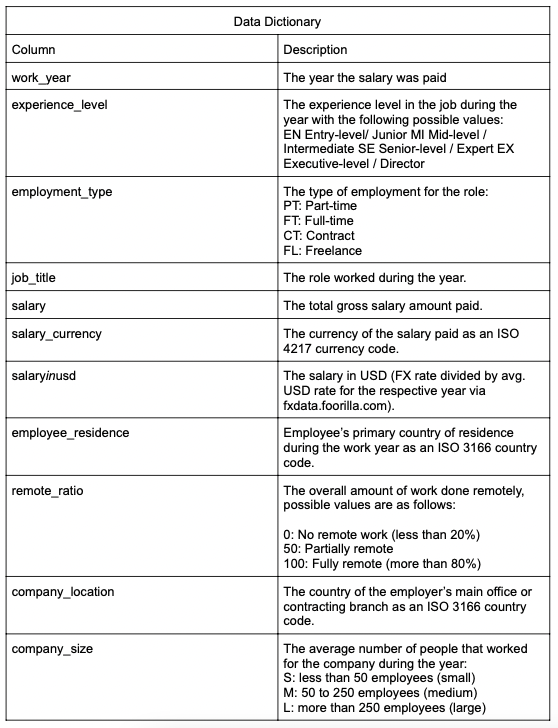

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRz5oaBgbdiqB7uuCThtSDZkuQ6PVnah-MIhF81nIhaee2YT0rHhLnhLPNBuZYUNO00U4YZRDqaL8ig/pub?gid=1930592101&single=true&output=csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L


In [3]:
df2 = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          607 non-null    int64  
 1   work_year           607 non-null    int64  
 2   experience_level    589 non-null    object 
 3   employment_type     607 non-null    object 
 4   job_title           607 non-null    object 
 5   salary              607 non-null    object 
 6   salary_currency     607 non-null    object 
 7   salary_in_usd       587 non-null    float64
 8   employee_residence  607 non-null    object 
 9   remote_ratio        607 non-null    int64  
 10  company_location    607 non-null    object 
 11  company_size        607 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 57.0+ KB


## Data Cleaning

How many rows/columns:

In [5]:
df.shape

(607, 12)

 - There are 607 rows and 12 columns

Checking the data types:

In [6]:
df.dtypes

Unnamed: 0              int64
work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                 object
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

 - There is an Unnamed: 0 column that is a repeating of the index. This column will need to be dropped. 

 - Also, the salary column is showing as an object type column and should be either a float64 or an int64 type column.

 - All other data types are as they should be.

### Dropping Unnamed: 0 Column

- We will drop the `Unnamed: 0` column since this column is a repeating of the index. 
- We will then check `df.info()` again to make sure that the column is dropped.

In [7]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    589 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary              607 non-null    object 
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       587 non-null    float64
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 52.3+ KB


### Duplicated Data
Checking for duplicated data:

In [8]:
df.duplicated().sum()

32

- There are 32 duplicates in the dataset which we will drop.

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

- Checking to make sure duplicates were dropped.

### Missing Values
Checking for missing values:

In [11]:
df.isna().sum()

work_year              0
experience_level      18
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd         20
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

Identifying % of missing data (optional)

In [12]:
df.isna().sum() / len(df) * 100

work_year             0.000000
experience_level      3.130435
employment_type       0.000000
job_title             0.000000
salary                0.000000
salary_currency       0.000000
salary_in_usd         3.478261
employee_residence    0.000000
remote_ratio          0.000000
company_location      0.000000
company_size          0.000000
dtype: float64

- Missing Values:
  - There are `18` missing values in the `experience level` column. (2.97%) 
  - There are `20` missing values in the `salary in usd` column. (3.29%)

- In order to make informed decisions about how to handle missing data, we will do some additional EDA.

Inspecting Experience Level:

- Here we are setting the style to use for seaborn so that all the visuals have the same format.

In [13]:
## Using two seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

In [14]:
df['experience_level'].value_counts()

SE    244
MI    206
EN     85
EX     22
Name: experience_level, dtype: int64

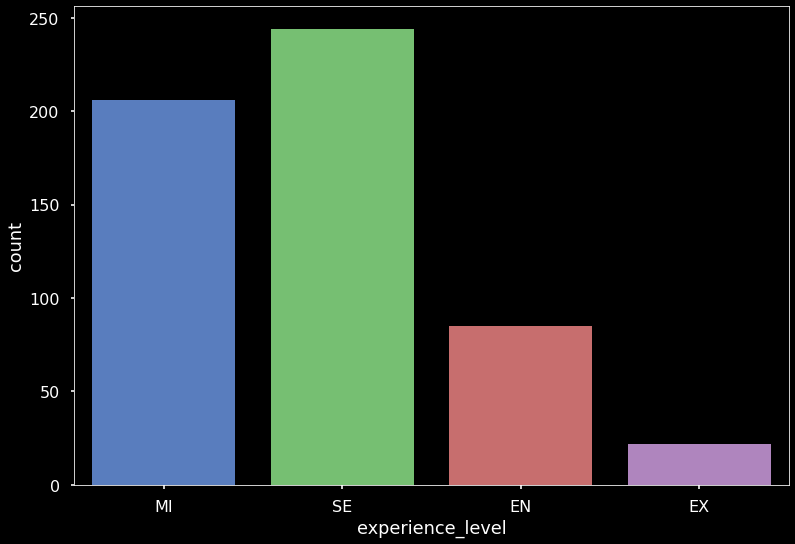

In [15]:
ax = sns.countplot(data = df, x = 'experience_level');

 - This graph shows that there are over 250 senior level executives while there are less than 25 expert level executives.
  - `Strategy #1`: To deal with the missing values, we could simply `drop` the missing values.
  - `Strategy #2`: To deal with the missing values, we could fill them in with the `most frequent` for this feature.
  - `Strategy #3`: To deal with the missing values, we could fill them in with the word `Unknown` for this feature.

- We will select `Strategy #3` to fill in the missing values with the word `Unknown` so that the values will be filled in, but we will still be aware that those values are unknown.

- Filling in the `experience_level` column with the word `Unknown`.

In [16]:
df['experience_level'] = df['experience_level'].fillna(value = 'Unknown')

In [17]:
df['experience_level'].value_counts()

SE         244
MI         206
EN          85
EX          22
Unknown     18
Name: experience_level, dtype: int64

- Checking to make sure the values for the `experience_level` column were filled in.

In [18]:
df.isna().sum()

work_year              0
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd         20
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

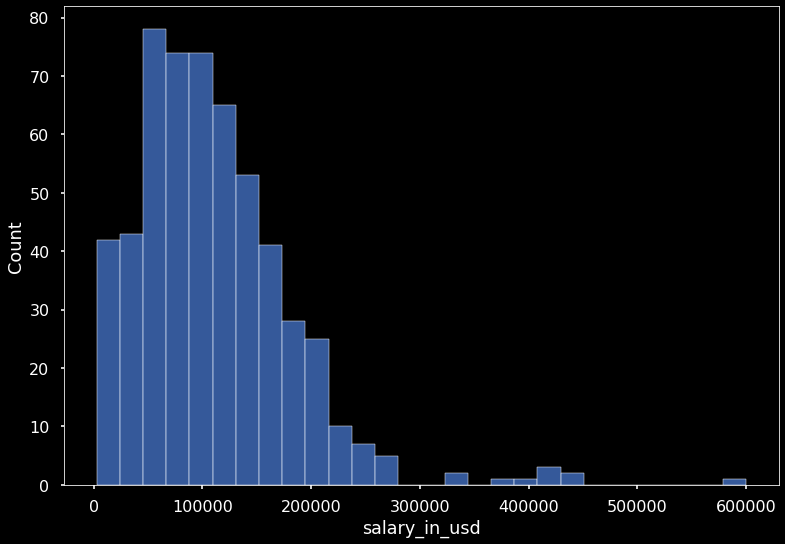

In [19]:
ax = sns.histplot(data = df, x = 'salary_in_usd')

- This histogram shows that the majority of the salaries are around $100,000.

  - `Strategy #1`: To deal with the missing values, we could simply `drop` the missing values.
  - `Strategy #2`: To deal with the missing values, we could fill them in with the `most frequent` for this feature.
  - `Strategy #3`: To deal with the missing values, we could fill them in with the `median/mean value` for this feature.

- To maintain as much data as possible, we will not drop the data. So we will choose either `Strategy #2` or `Strategy #3`. To make this choice we will do a bit more investigating.

In [20]:
print(df['salary_in_usd'].mean())
print(df['salary_in_usd'].median())

110239.92072072072
100000.0


- After further investigation, looks like the `mean` value would be about 
`$111,735.26` while the `median` value would be `$100,000`.
  - Since most of the values in the histogram above are around `$100,000`, I will choose to fill in the values with the `median`.

- Filling in the `salary_in_usd` column with the `median value`.

In [21]:
median_value = df['salary_in_usd'].median()
df['salary_in_usd'] = df['salary_in_usd'].fillna(median_value)

- Checking to make sure the values for the `salary_in_usd` column were filled in.

In [22]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Fixing Data Types

- We will now address the data types and make sure that they match the data dictionary.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           575 non-null    int64  
 1   experience_level    575 non-null    object 
 2   employment_type     575 non-null    object 
 3   job_title           575 non-null    object 
 4   salary              575 non-null    object 
 5   salary_currency     575 non-null    object 
 6   salary_in_usd       575 non-null    float64
 7   employee_residence  575 non-null    object 
 8   remote_ratio        575 non-null    int64  
 9   company_location    575 non-null    object 
 10  company_size        575 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 70.1+ KB


In [24]:
pd.set_option('display.max_rows', None)
df['salary'].value_counts()

80000       18
120000      15
100000      15
60000       14
150000      14
50000       12
75000       11
200000      10
130000      10
70000       10
90000       10
135000       9
160000       8
180000       8
110000       8
40000        8
170000       7
65000        7
85000        7
55000        6
115000       6
45000        6
20000        6
105000       5
30000        5
48000        4
165000       4
58000        4
250000       4
450000       4
140000       4
35000        4
125000       4
140400       3
144000       3
235000       3
54000        3
220000       3
12000        3
59000        3
205300       3
42000        3
112900       3
81666        2
153000       2
53000        2
240000       2
102100       2
167000       2
106260       2
126500       2
7000000      2
24000        2
160080       2
220110       2
132320       2
225000       2
38400        2
109280       2
155000       2
210000       2
95000        2
4000         2
115934       2
147000       2
215300       2
174000    

- Upon further investigating, all of the values in the salary column are integers. Therefore, this column should be an int64 column instead of an object type column.

In [25]:
#df['salary'] = df['salary'].astype('int64')

- `Aha!` There is a dollar symbol in this column causing this column to not convert to an int64 type column. We will change the value for this entry and try again.

- We will use a filter to find the place where there is a dollar sign symbol in the dataset. Then we will assign that cell a value of `100000`.

In [26]:
dollar_sign = df['salary'] == '$100,000'

df.loc[dollar_sign, 'salary'] = 100000

#df[dollar_sign]

- Now we can convert the `salary` column to an `int64`.

In [27]:
df['salary'] = df['salary'].astype('int64')

- We will check the datatypes once more to make sure that they are as they should be. 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           575 non-null    int64  
 1   experience_level    575 non-null    object 
 2   employment_type     575 non-null    object 
 3   job_title           575 non-null    object 
 4   salary              575 non-null    int64  
 5   salary_currency     575 non-null    object 
 6   salary_in_usd       575 non-null    float64
 7   employee_residence  575 non-null    object 
 8   remote_ratio        575 non-null    int64  
 9   company_location    575 non-null    object 
 10  company_size        575 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 70.1+ KB


### Inspecting Categorical Columns & Addressing Inconsistent Values

- We will now use a filter to create a for loop that loops through all of the object type columns so that we can inspect them further.

In [29]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [30]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- experience_level:
SE         244
MI         206
EN          85
EX          22
Unknown     18
Name: experience_level, dtype: int64



- employment_type:
FT    556
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64



- job_title:
Data Scientist                              102
Data Engineer                                95
Data Analyst                                 75
Machine Learning Engineer                    39
data scientist                               29
data engr                                    28
Research Scientist                           16
data analyst                                 14
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager            

- After further investigation of the categorical columns, there are inconsistencies with spellings of the following categories in the `job_title` column:
  - `data scientist` should be `Data Scientist`
  - `data engr` should be `Data Engineer`
  - `data analyst` should be `Data Analyst`

- We will address these inconsistencies with a data map and use a dictionary to replace the inconsistent categories.

In [31]:
job_content_map = {'data scientist':'Data Scientist',
                   'data engr':'Data Engineer',
                   'data analyst':'Data Analyst'}

df['job_title'] = df['job_title'].replace(job_content_map)

- We will now verify that all of the inconsistent values in that column have been addressed.

In [32]:
df['job_title'].value_counts()

Data Scientist                              131
Data Engineer                               123
Data Analyst                                 89
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

- We will know clean up and rename the experience level categories.

In [33]:
df['experience_level'] = df['experience_level'].replace('EN','Junior')
df['experience_level'] = df['experience_level'].replace('MI','Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Expert')
df['experience_level'] = df['experience_level'].replace('EX','Director')

- We will know clean up and rename the employment type categories.

In [34]:
df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('PT','Part-Time')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

### Summary Statistics for Numeric Features

- We will now view use df.describe() to view the summary statistics for the numeric features.

In [35]:
df.describe().round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,575.00,575.00,575.00,575.00
mean,2021.37,334434.87,109883.75,70.09
std,0.70,1586130.85,71140.96,40.91
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,68500.00,61733.50,50.00
50%,2021.00,112300.00,100000.00,100.00
75%,2022.00,165000.00,147400.00,100.00
max,2022.00,30400000.00,600000.00,100.00


- Here is another method to look at just the `mean`, `min`, and `max` for each numeric column.

In [36]:
stats =  df.describe()
stats.loc[['mean','min','max']]

,work_year,salary,salary_in_usd,remote_ratio
mean,2021.373913,3.344349e+05,109883.749565,70.086957
min,2020.000000,4.000000e+03,2859.000000,0.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


- Looks like there is an extreme value for the salary maximum. It showing a value for the max of `30400000.00`. This could be a mistake, or it could be a valid data point due to there being a mix of currency types in this particular column. We will go ahead and drop this value.

In [37]:
over_3mill = df['salary'] == 30400000.00

df[over_3mill]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
177,2021,Intermediate,Full-Time,Data Scientist,30400000,CLP,40038.0,CL,100,CL,L


In [38]:
df.drop(index=177, inplace = True)

# Project 1 - Part 3

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

Please feel free to add more than the minimum. Remember this is your chance to display your skills!

## Exploratory Visuals & Analysis

- Note: There are many different ways students could tackle this EDA. Additionally, there are more advanced ways to plot the data. 

- Approaches
We will go Column-by-Column with the EDA using a function (plus markdown interpretations for each)

In [39]:
# Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           574 non-null    int64  
 1   experience_level    574 non-null    object 
 2   employment_type     574 non-null    object 
 3   job_title           574 non-null    object 
 4   salary              574 non-null    int64  
 5   salary_currency     574 non-null    object 
 6   salary_in_usd       574 non-null    float64
 7   employee_residence  574 non-null    object 
 8   remote_ratio        574 non-null    int64  
 9   company_location    574 non-null    object 
 10  company_size        574 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 53.8+ KB


- For each numeric feature, we will plot the distribution and a boxplot.

In [40]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

### 1. EDA Using Loops

### Column-by-Column EDA using a function (plus markdown interpretations for each)

- Below, I chose not to visual the `work_year` and the `remote_ratio` since this will only show the counts for each particular year or the counts for the remote work ratio.
   - `work_year`: 2020, 2021 or 2022
   - `remote_ratio`: 0%, 50%, or 100%

In [41]:
df['work_year'].value_counts()

2022    287
2021    215
2020     72
Name: work_year, dtype: int64

In [42]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

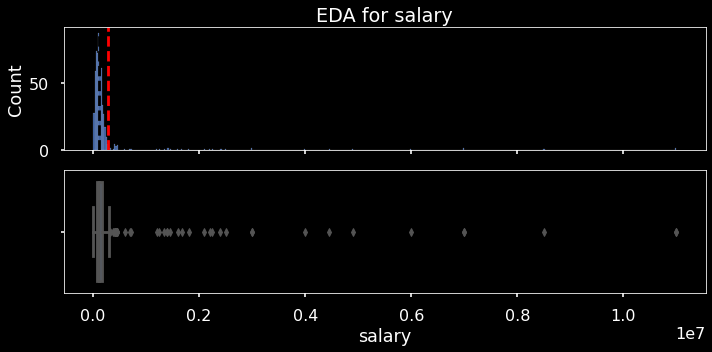

In [43]:
plot_numeric(df,'salary')

- Here on the boxplot, you can clearly see that there are several outliers in the salary column. These could be valid data points, or they could be an error.
- Since there are expert executives that are included in this dataset, and they most likely earn signficantly more than other employees, I will leave these datapoints in place.

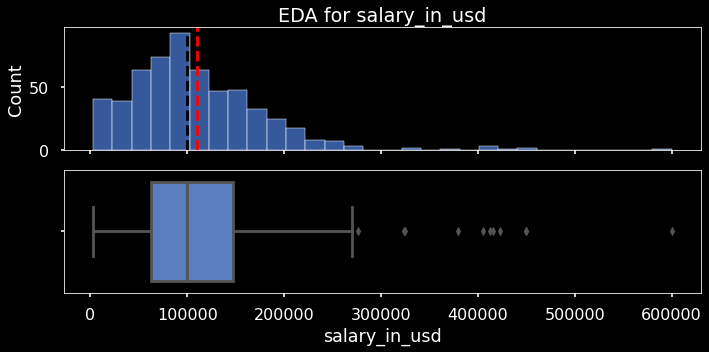

In [44]:
plot_numeric(df,'salary_in_usd')

- You can clearly see that the median is around $100,000 for this particular column. Imputing the values of this feature, definitely added to the taller bar being a bit higher.
- The boxplot shows that there are some outliers in terms of salary. These are most likely valid values.

### Visualizing with Barplots
- We will view the categorical counts of all of the object type columns and visualize this information with a barplot. 

In [45]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(10,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot
    
    ## counts, counts up the categories, sort the values, then puts them in a 
    ## data frame.
    
    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

Expert          244
Intermediate    205
Junior           85
Director         22
Unknown          18
Name: experience_level, dtype: int64


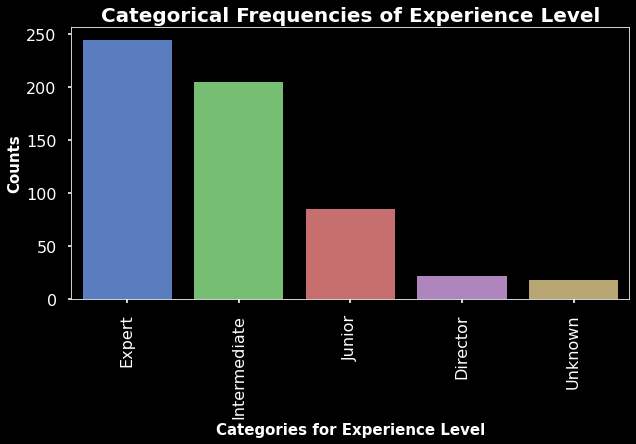

In [46]:
fig, ax = plot_bar(df, 'experience_level', 'Experience Level');
print(df['experience_level'].value_counts())

- From this graph, we can see that there are mostly Expert Level Executives in the workforce.
- Also, we see that the least amount for experience level is in the Director Level cateory (minus the Unknown category).

Data Scientist                              130
Data Engineer                               123
Data Analyst                                 89
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

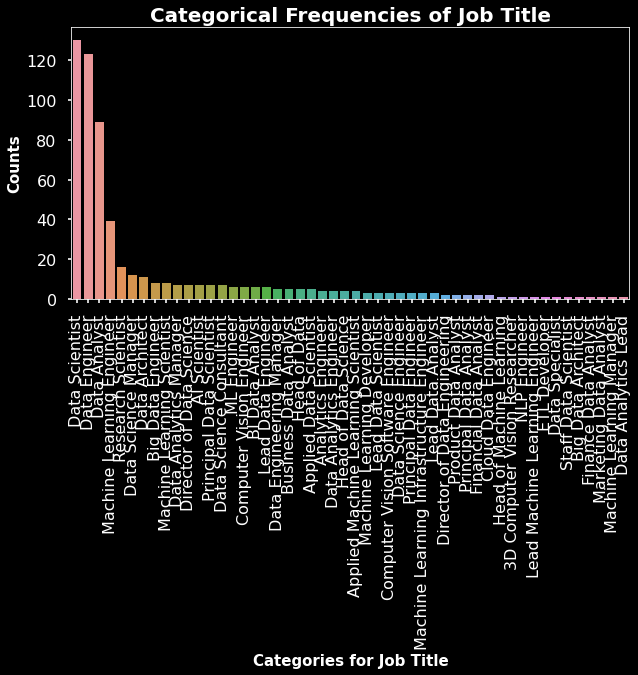

In [47]:
fig, ax = plot_bar(df, 'job_title', 'Job Title')
print(df['job_title'].value_counts())

Full-Time    555
Part-Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64


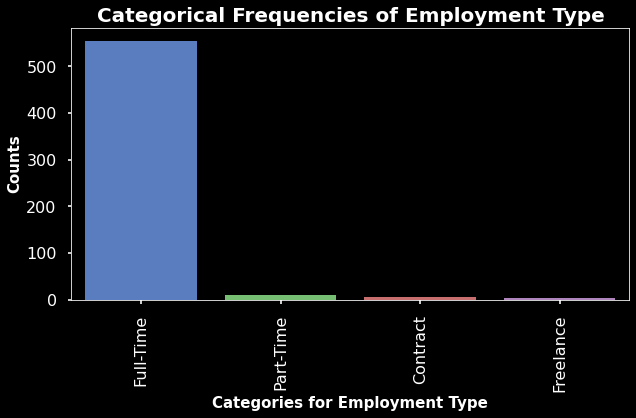

In [48]:
fig, ax = plot_bar(df, 'employment_type', 'Employment Type')
print(df['employment_type'].value_counts())

- Here we can see that most employees are Full Time. The least amount of employees are Freelance.

- Here we can see that the top five job titles that have the most workers are as follows:
  - Data Scientist
  - Data Engineer
  - Data Analyst
  - Machine Learning Engineer
  - Research Scientist

- We can also see that the bottom five job titles are as follows (From bottom to top):
  - Data Analytics Lead
  - Machine Learning Manager
  - Marketing Data Analyst
  - Finance Data Analyst  
  - Big Data Architect

USD    369
EUR     93
GBP     43
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
HUF      2
CNY      2
MXN      2
DKK      2
SGD      2
BRL      2
AUD      2
CHF      1
Name: salary_currency, dtype: int64


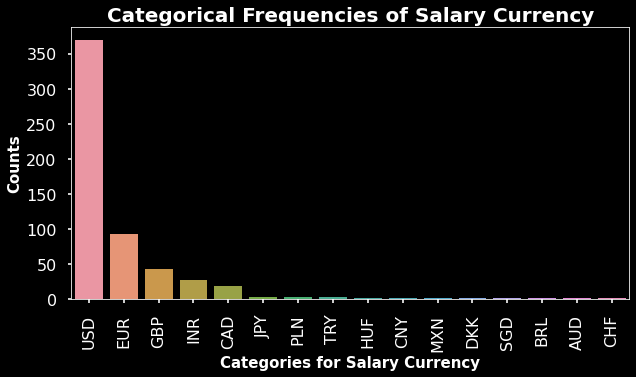

In [49]:
fig, ax = plot_bar(df, 'salary_currency', 'Salary Currency');
print(df['salary_currency'].value_counts())

- Here we can see that most of the salary currency for job roles for Data Scientists are in USD. 
- This could imply that most of the roles are in the US. Or it could mean that that is where the majority of the data was collected from.

US    304
GB     43
IN     30
CA     28
DE     24
FR     18
ES     15
GR     12
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
RU      4
IT      4
AE      3
VN      3
AT      3
TR      3
AU      3
BE      2
SG      2
DK      2
RO      2
HU      2
NG      2
SI      2
MX      2
PR      1
LU      1
JE      1
CZ      1
EE      1
AR      1
DZ      1
TN      1
MY      1
BO      1
IE      1
RS      1
MT      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64


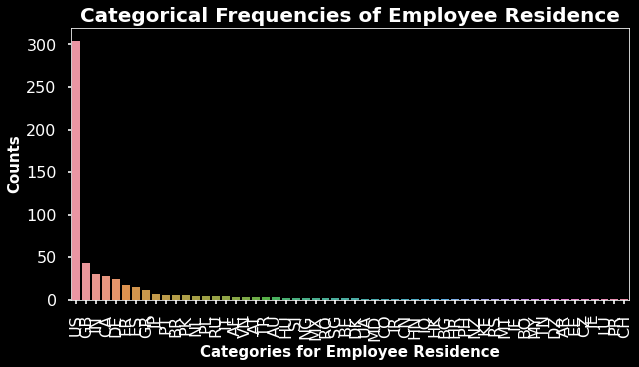

In [50]:
fig, ax = plot_bar(df, 'employee_residence', 'Employee Residence');
print(df['employee_residence'].value_counts())

- Here we see that most of the employees live in the United States.

US    327
GB     46
CA     29
DE     27
IN     24
FR     15
ES     14
GR     10
JP      6
NL      4
PT      4
AT      4
PL      4
AE      3
LU      3
BR      3
PK      3
MX      3
AU      3
TR      3
DK      3
CZ      2
RU      2
IT      2
CH      2
SI      2
NG      2
CN      2
BE      2
VN      1
DZ      1
AS      1
MD      1
EE      1
MY      1
KE      1
IL      1
CO      1
IR      1
MT      1
UA      1
IQ      1
RO      1
SG      1
HN      1
HR      1
HU      1
NZ      1
IE      1
Name: company_location, dtype: int64


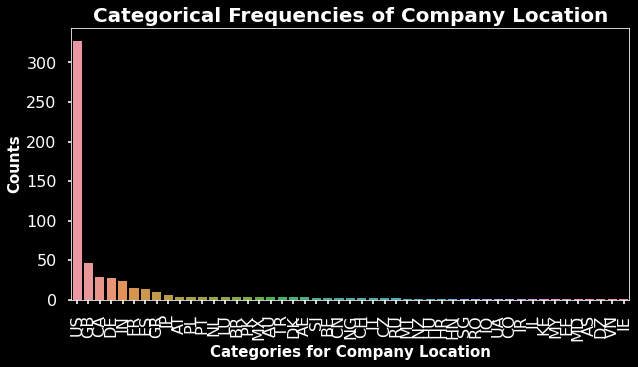

In [51]:
fig, ax = plot_bar(df, 'company_location', 'Company Location');
print(df['company_location'].value_counts())

- Here we see that most of the companies, for this particular dataset, were in the US.

M    297
L    194
S     83
Name: company_size, dtype: int64


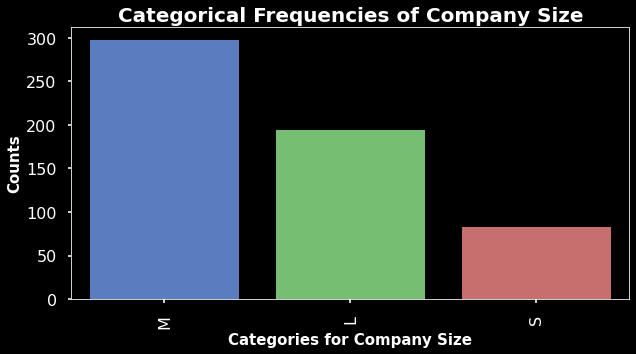

In [52]:
fig, ax = plot_bar(df, 'company_size', 'Company Size');
print(df['company_size'].value_counts())

- Here we see that majority of the companies are medium sized companies.

### EDA for Correlated Features

2022    287
2021    215
2020     72
Name: work_year, dtype: int64


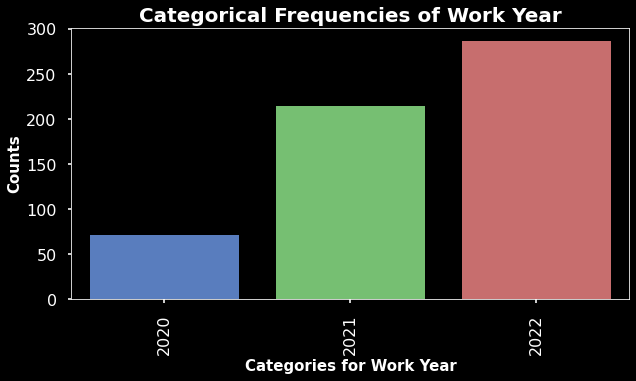

In [53]:
fig, ax = plot_bar(df, 'work_year', 'Work Year')
print(df['work_year'].value_counts())

- Here we see that there were an increase of workers in 2022.

100    353
0      123
50      98
Name: remote_ratio, dtype: int64


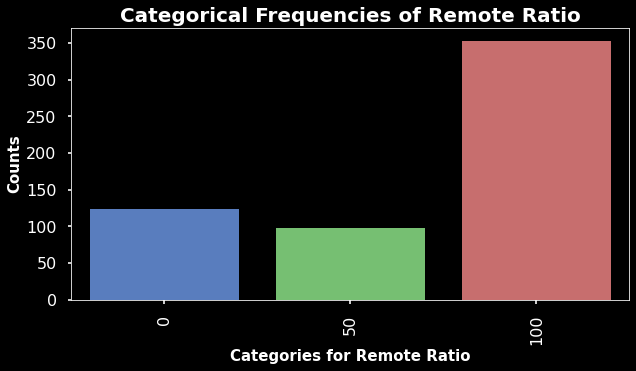

In [54]:
fig, ax = plot_bar(df, 'remote_ratio', 'Remote Ratio')
print(df['remote_ratio'].value_counts())

- There are definitely a greater number of workers that are 100% remote for this particular dataset.

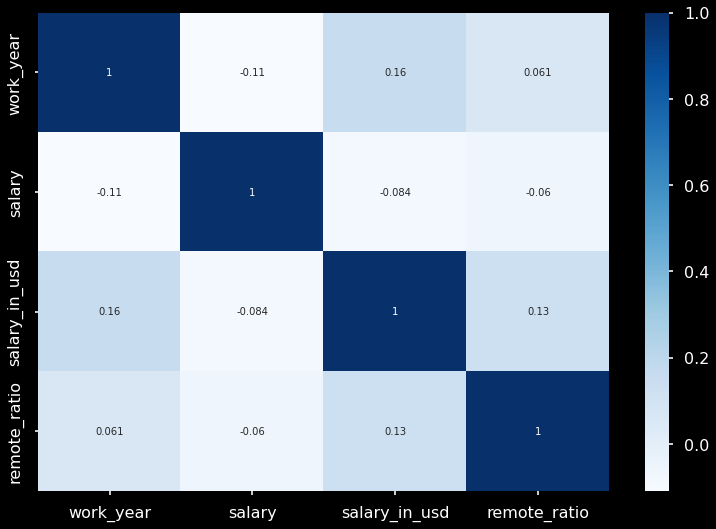

In [55]:
sns.heatmap(df.corr(),annot=True,cmap='Blues');

- There aren't really any strong or even moderate correlations shown here. 
- There is a weak postive correlation between the `salary_in_usd` and the `work_year`. 
- All of the other correlations are negligible.

### Big-Picture EDA/ All Features At Once:

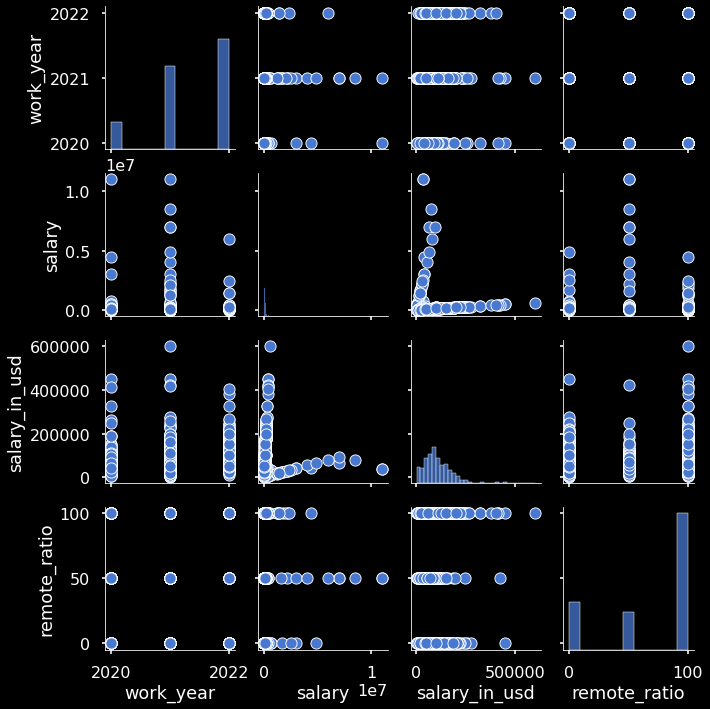

In [56]:
sns.pairplot(df);

- Here we can see that majority of these roles are 100% remote work ratio.
- We also can see that 2021 has the highest earned salaries when compared to the other years.
- Lastly, we can see that the 100% remote work ratio has the greatest salary values for salary in usd.


# Project 1 - Part 4

## Explanatory Visuals & Analysis

>For Part 4, our task is to build several data visualizations to help  stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

- We will build on our previous cleaning, exploration, and analysis.  
- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

### Possible Questions to Answer:
  1. Which job titles earn the most and least money?
  2. Which experience levels earn the most and least money?
  3. How many roles work 100% remotely?
  4. What is the trend for earnings for the last 3 years?

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           574 non-null    int64  
 1   experience_level    574 non-null    object 
 2   employment_type     574 non-null    object 
 3   job_title           574 non-null    object 
 4   salary              574 non-null    int64  
 5   salary_currency     574 non-null    object 
 6   salary_in_usd       574 non-null    float64
 7   employee_residence  574 non-null    object 
 8   remote_ratio        574 non-null    int64  
 9   company_location    574 non-null    object 
 10  company_size        574 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 70.0+ KB


#### 1. Which job titles earn the most and least money?

In [58]:
means = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
means

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    198099.571429
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139197.833333
Head of Data                                134162.600000
Data Analytics Manager                      127134.285714
Clou

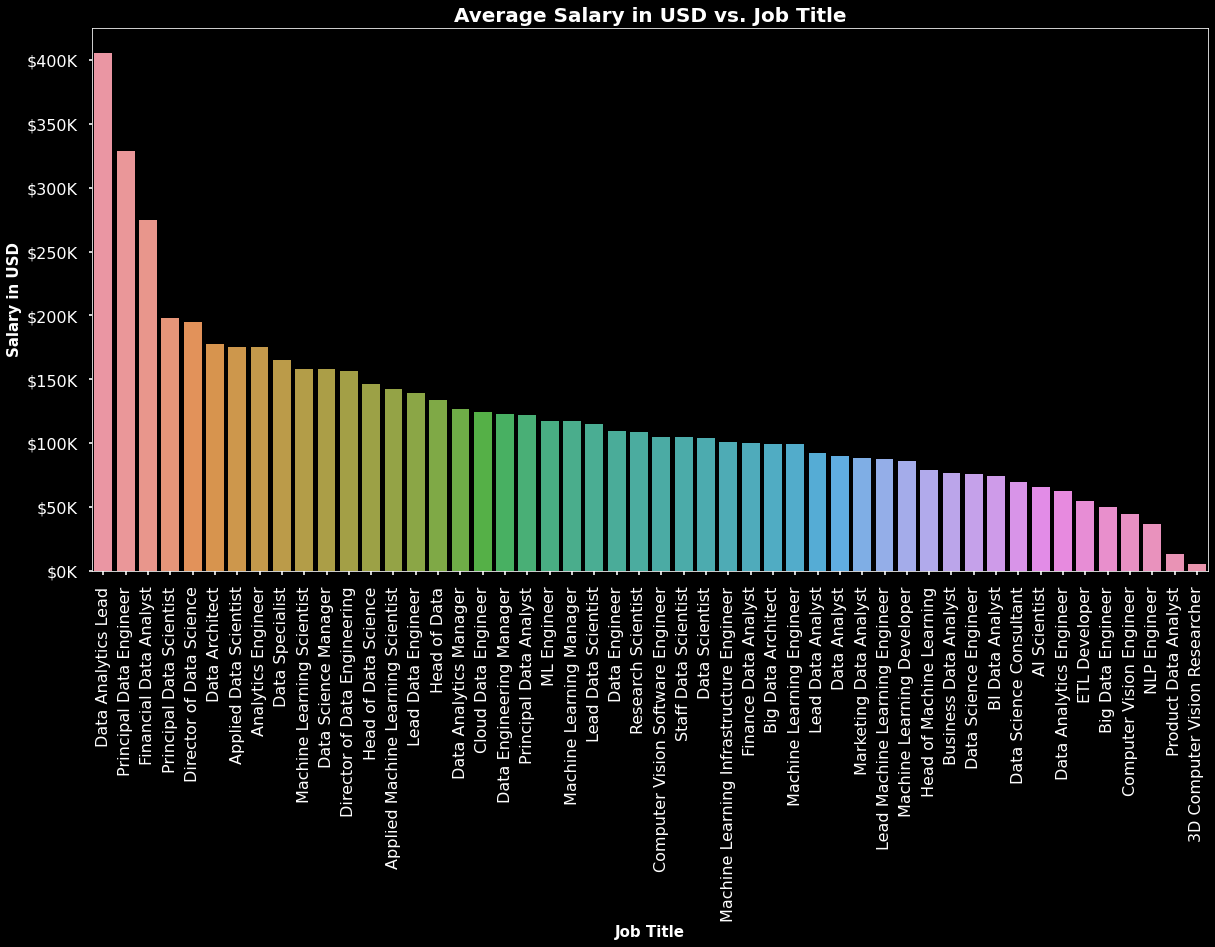

In [59]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='job_title', y = 'salary_in_usd', order = means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Salary in USD vs. Job Title', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Job Title', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Salary in USD', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

The top five highest earning job titles and average salaries are as follows:

- Data Analytics Lead: `$405,000.00`
- Principal Data Engineer: `$328,333.33`
- Financial Data Analyst: `$275,000.00`
- Principal Data Scientist: `$198,099.57`
- Director of Data Science: `$195,074.00`

The bottom five least paying job titles and average salaries are as follows: 


- 3D Computer Vision Researcher: `$5,409.00`
- Product Data Analyst: `$13,036.00`
- NLP Engineer: `$37,236.00`
- Computer Vision Engineer: `$44,419.33`
- Big Data Engineer: `$50,218.12`

#### 2. Which experience levels earn the most and least amount of money?

In [60]:
means2 = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
means2

experience_level
Director        199561.818182
Expert          136632.868852
Unknown         109802.166667
Intermediate     88603.331707
Junior           62049.600000
Name: salary_in_usd, dtype: float64

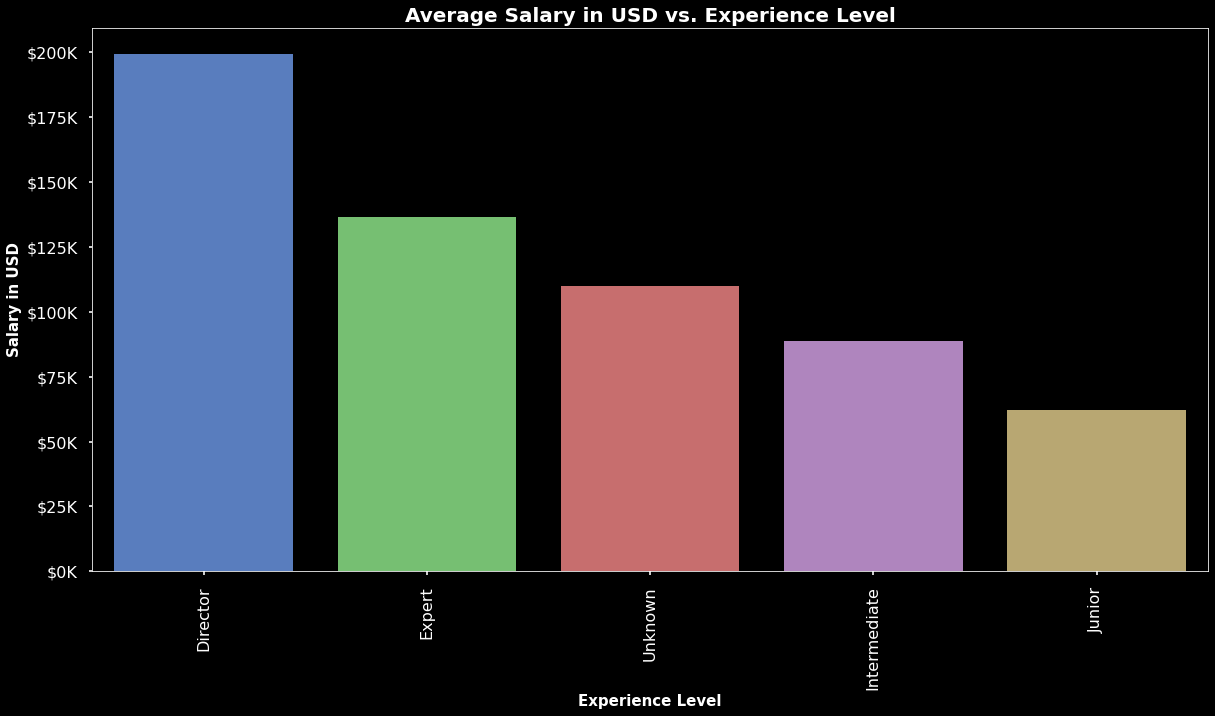

In [61]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='experience_level', y = 'salary_in_usd', order = means2.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Salary in USD vs. Experience Level', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Experience Level', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Salary in USD', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

The top and bottom earning experience level and average salary is as follows:

- Top Earning Experience Level
  - Director Level: `$199,561.81`
- Bottom Earning Experience Level
  - Junior Level: `$62,049.60`

#### 3. How many roles work 100% remotely?

In [62]:
df['remote_ratio'].value_counts()

100    353
0      123
50      98
Name: remote_ratio, dtype: int64

In [63]:
remote_100 = df[df['remote_ratio'] == 100]
remote_100 = remote_100['job_title'].value_counts().sort_values(ascending = False).to_frame()
remote_100.head()

,job_title
Data Engineer,84
Data Scientist,67
Data Analyst,63
Machine Learning Engineer,22
Data Architect,11


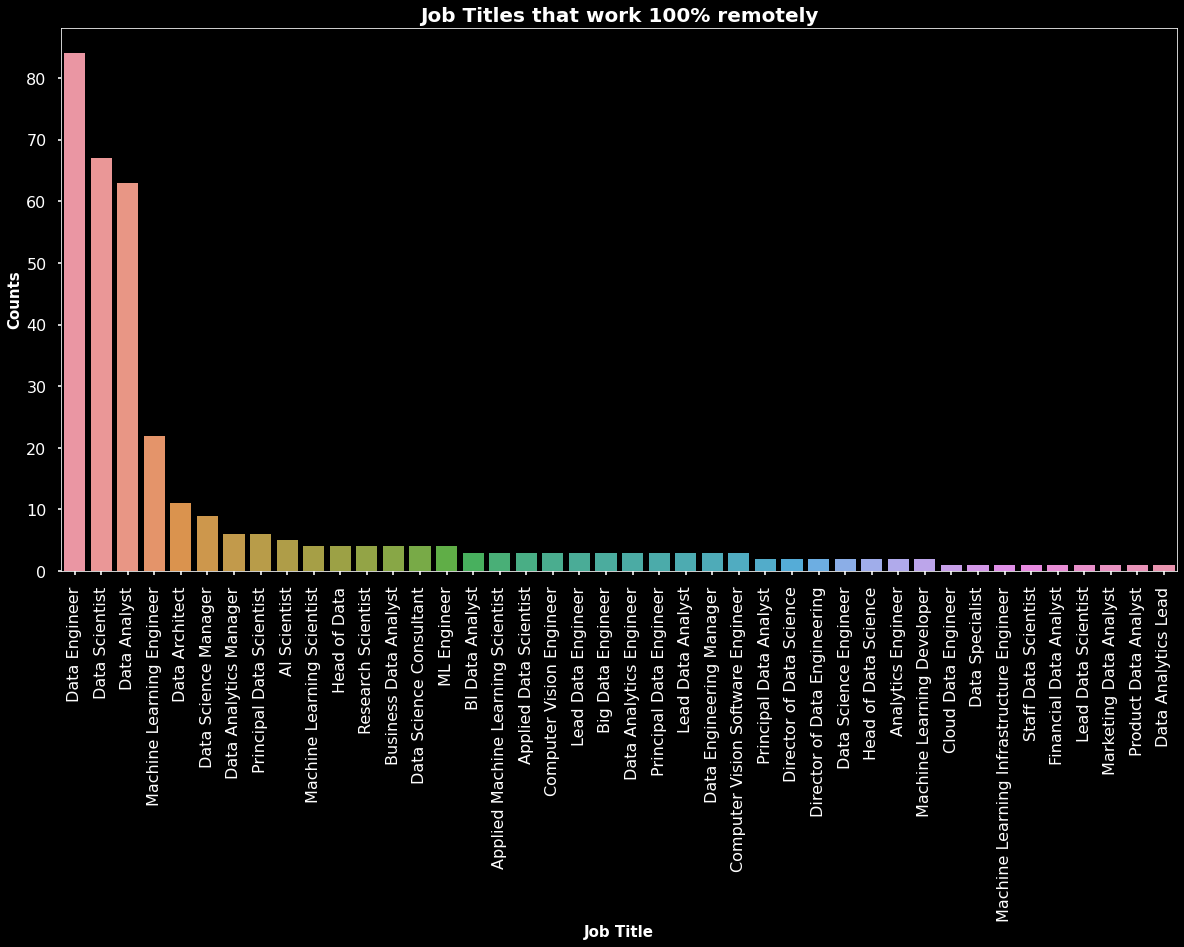

In [64]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=remote_100,x = remote_100.index, y = remote_100['job_title'])
plt.xticks(rotation = 90)
ax.set_title('Job Titles that work 100% remotely', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Job Title', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold');

This graph shows that `Data Engineers` have the most roles that are 100% remote, while `Cloud Data Engineers` through `Data Analytics Leads` have the least amount of 100% remote roles.

#### 4. What is the trend for earnings for the last 3 years?

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           574 non-null    int64  
 1   experience_level    574 non-null    object 
 2   employment_type     574 non-null    object 
 3   job_title           574 non-null    object 
 4   salary              574 non-null    int64  
 5   salary_currency     574 non-null    object 
 6   salary_in_usd       574 non-null    float64
 7   employee_residence  574 non-null    object 
 8   remote_ratio        574 non-null    int64  
 9   company_location    574 non-null    object 
 10  company_size        574 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 70.0+ KB


In [66]:
df['work_year'].value_counts()

2022    287
2021    215
2020     72
Name: work_year, dtype: int64

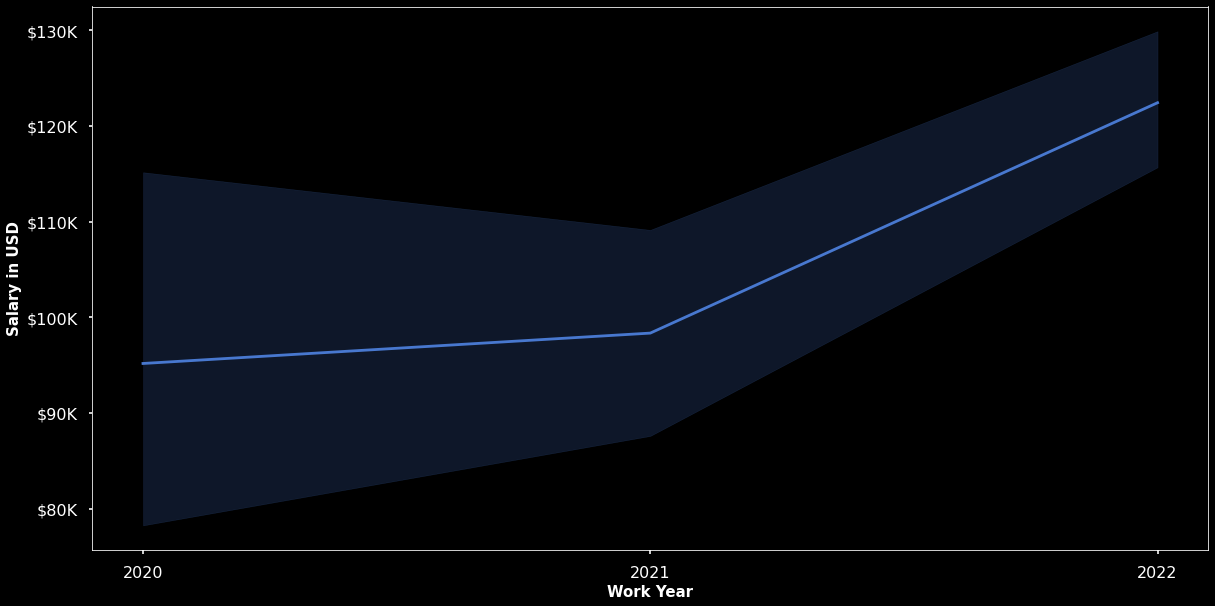

In [67]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.lineplot(data=df,x = 'work_year', y = 'salary_in_usd')
ax.set_title('', fontsize = 20, fontweight = 'bold');

labels = [0,2020,2021,2022]

ax.set_xticklabels(labels)
plt.locator_params(axis='x', nbins=3)

ax.set_xlabel('Work Year', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Salary in USD', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

This graph shows that workers in 2022 earned the most amount of money.


# Project 1 - Part 5

## Preprocesing for Machine Learning

>For Part 5, you will go back to your original dataset with the goal of preventing data leakage.  

Please note: If you imputed missing values based on a calculation on the entire dataset (such as mean), you should now perform that step after the train test split using SimpleImputer.  

*   Identify the target (X) and features (y): We will assign the 'salary_in_usd' as the target and the rest of the relevant variables as the features matrix.
*   Perform a train test split 
*   Create a pre processing pipeline to prepare the dataset for Machine Learning


### Imports

In [68]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

### Reloading in the Data

In [69]:
df2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L


### Performing Preprocessing Steps

In [70]:
# Dropping Unnamed: 0 Column

df2.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    589 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary              607 non-null    object 
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       587 non-null    float64
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 52.3+ KB


In [71]:
# Checking for Duplicates
df2.duplicated().sum()

32

In [72]:
# Dropping Duplicates
df2.drop_duplicates(inplace = True)

In [73]:
# Checking again for Duplicates
df2.duplicated().sum()

0

In [74]:
# Checking missing values
df2.isna().sum()

work_year              0
experience_level      18
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd         20
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

In [75]:
# Fixing bad value in salary column
dollar_sign = df2['salary'] == '$100,000'

df2.loc[dollar_sign, 'salary'] = 100000

In [76]:
# Converting salary column to an int64 column
df2['salary'] = df2['salary'].astype('int64')

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           575 non-null    int64  
 1   experience_level    557 non-null    object 
 2   employment_type     575 non-null    object 
 3   job_title           575 non-null    object 
 4   salary              575 non-null    int64  
 5   salary_currency     575 non-null    object 
 6   salary_in_usd       555 non-null    float64
 7   employee_residence  575 non-null    object 
 8   remote_ratio        575 non-null    int64  
 9   company_location    575 non-null    object 
 10  company_size        575 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 53.9+ KB


In [78]:
# replacing inconsistent categories in job_title column
# then checking to make sure the change took place

job_content_map = {'data scientist':'Data Scientist',
                   'data engr':'Data Engineer',
                   'data analyst':'Data Analyst'}

df2['job_title'] = df2['job_title'].replace(job_content_map)
df2['job_title'].value_counts()

Data Scientist                              131
Data Engineer                               123
Data Analyst                                 89
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [79]:
# Redefining work year as an ordinal cateogorical variable.
workyear_content_map = {2020:0,
                   2021:1,
                   2022:2}

df2['work_year'] = df2['work_year'].replace(workyear_content_map)
df2['work_year'].value_counts()

2    287
1    216
0     72
Name: work_year, dtype: int64

### Defining X and y

In [80]:
# Dropping missing values in salary_in_usd column
# Must drop these values that are missing since this
# column is our target

df2 = df2.dropna(subset = ['salary_in_usd'], how = 'all')

In [81]:
## Define X and y
target = 'salary_in_usd'

X = df2.drop(columns=target).copy()
y = df2[target].copy()
X.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,0,MI,FT,Data Scientist,70000,EUR,DE,0,DE,L
1,0,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
2,0,SE,FT,Big Data Engineer,85000,GBP,GB,50,GB,M
3,0,MI,FT,Product Data Analyst,20000,USD,HN,0,HN,S
4,0,SE,FT,Machine Learning Engineer,150000,USD,US,50,US,L


### Dropping Unwanted Columns

- Here we are going to drop the `salary` and `salary_currency` columns due to these being in different units in the column. 
- To ensure consistency in the predictions, all columns need to have the same units for the entire column.

In [82]:
## Drop unwanted/inappropriate columns 
bad_cols = ['salary', 'salary_currency']
X = X.drop(columns=bad_cols)
X.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,0,MI,FT,Data Scientist,DE,0,DE,L
1,0,SE,FT,Machine Learning Scientist,JP,0,JP,S
2,0,SE,FT,Big Data Engineer,GB,50,GB,M
3,0,MI,FT,Product Data Analyst,HN,0,HN,S
4,0,SE,FT,Machine Learning Engineer,US,50,US,L


### Train-Test-Split

In [83]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Making a Preprocessing Pipeline

In [84]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include = 'object')
cat_selector(X_train)

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']

In [85]:
# Creating a pipline for handling categorical data

impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

cat_pipe = make_pipeline(impute_cat,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [86]:
## test cat_pipe (optional)
cat_pipe.fit_transform(X_train[cat_selector(X_train)])

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [87]:
# Creating a numeric data selector
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['work_year', 'remote_ratio']

In [88]:
# Creating scaler object to scale the data
scaler = StandardScaler()

In [89]:
## test num_pipe (optional)
scaler.fit_transform(X_train[num_selector(X_train)])

array([[ 0.8817154 , -1.69764791],
       [ 0.8817154 ,  0.73340727],
       [-0.54549708, -1.69764791],
       [ 0.8817154 ,  0.73340727],
       [-1.97270956, -0.48212032],
       [ 0.8817154 ,  0.73340727],
       [ 0.8817154 ,  0.73340727],
       [ 0.8817154 , -1.69764791],
       [ 0.8817154 ,  0.73340727],
       [-0.54549708,  0.73340727],
       [ 0.8817154 , -1.69764791],
       [ 0.8817154 ,  0.73340727],
       [-0.54549708, -1.69764791],
       [-0.54549708, -0.48212032],
       [ 0.8817154 ,  0.73340727],
       [ 0.8817154 , -1.69764791],
       [ 0.8817154 ,  0.73340727],
       [ 0.8817154 ,  0.73340727],
       [-0.54549708, -0.48212032],
       [-0.54549708, -0.48212032],
       [ 0.8817154 , -1.69764791],
       [-0.54549708,  0.73340727],
       [ 0.8817154 ,  0.73340727],
       [-1.97270956, -1.69764791],
       [ 0.8817154 , -1.69764791],
       [-1.97270956,  0.73340727],
       [ 0.8817154 ,  0.73340727],
       [ 0.8817154 ,  0.73340727],
       [ 0.8817154 ,

In [90]:
## Combine into 1 column transformer
preprocessor = make_column_transformer((cat_pipe,cat_selector),
                                       (scaler,num_selector))
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0a1be1f110>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0a1be41e10>)])

In [91]:
## Test Col Transformer (optional)
preprocessor.fit_transform(X_train)

array([[ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.8817154 , -1.69764791],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.8817154 ,  0.73340727],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.54549708, -1.69764791],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.54549708, -1.69764791],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.8817154 ,  0.73340727],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.54549708, -0.48212032]])

In [92]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

# Project 1 - Part 6


This week, we will finalize your our project. The goal of this is to help stakeholders understand how the variables of data science roles influence the salaries that are earned.

1) Your first task is to build a linear regression model to predict sales.

*   Build a linear regression model.
*   Evaluate the performance of your model based on r^2.
*   Evaluate the performance of your model based on rmse.

2) Your second task is to build a regression tree model to predict sales.  

*   Build a simple regression tree model.
*   Compare the performance of your model based on r^2.
*   Compare the performance of your model based on rmse.  

3) You now have tried 2 different models on your data set. You need to determine which model to implement.

*   Overall, which model do you recommend?
*   Justify your recommendation.

4) To finalize this project, complete a README in your GitHub repository including:

*   An overview of the project
*   2 relevant insights from the data (supported with reporting quality visualizations)
*   Summary of the model and its evaluation metrics
*   Final recommendations 

Please note:

*   Do not include detailed technical processes or code snippets in your README. If readers want to know more technical details they should be able to easily find your notebook to learn more.
*   Make sure your GitHub repository is organized and professional. Remember, this should be used to showcase your data science skills and abilities.

## Maching Learning - Training the Models

### Imports for Machine Learning

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [94]:
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0a1be1f110>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0a1be41e10>)])

### Fitting a Linear Regression Model

In [95]:
## Make and fit model
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0a1be1f110>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0a1be41e10>)])),
       

### y_hat Predictions

In [96]:
# Get predictions to use to evaluate model
y_hat_train = linreg_pipe.predict(X_train)
y_hat_test = linreg_pipe.predict(X_test)

### Function to Evaluate Model

In [97]:
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated
  
  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """
  
  r2 = r2_score(y_true,y_pred)
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)

  
  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - MAE = {round(mae,3)}")
  print(f"  - MSE = {round(mse,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

### Linear Regression Model

In [98]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.715
  - MAE = 24772.88
  - MSE = 1541151599.798
  - RMSE = 39257.504

Results for testing data:
  - R^2 = -1.442820300359156e+22
  - MAE = 2065461996953278.5
  - MSE = 6.752807031244359e+31
  - RMSE = 8217546489825512.0



## Linear Regression Model Observations

- This model performs fairly well on the training set. But performs very poorly on the testing set. 
- Most likely, this data is not well suited for a Linear Model. 
- Therefore, we will explore using other models to see how they perform.

### Importing Decision Tree Regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor

### Fitting a Decision Tree Regressor Model

In [100]:
## Make and fit model
dec_tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor(random_state = 42))
dec_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
y_hat_train = dec_tree_pipe.predict(X_train)
y_hat_test = dec_tree_pipe.predict(X_test)

### Decision Tree Regressor Model

In [101]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.902
  - MAE = 11180.149
  - MSE = 531243365.882
  - RMSE = 23048.717

Results for testing data:
  - R^2 = 0.186
  - MAE = 41512.219
  - MSE = 3809835283.133
  - RMSE = 61723.863



## Untuned Decision Tree Model Observations
- This model performs extremely well on the training data. However, it performs poorly on the testing data.
- This model is definitely overfit and will need tuning. 

### Creating a Loop to Tune Depth for Decision Tree Regressor Model

In [102]:
#create a range of max_depth values
depths = range(1, dec_tree_pipe['decisiontreeregressor'].get_depth())

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(random_state = 42, max_depth=n)

  #put the model into a pipeline
  tree_pipe = make_pipeline(preprocessor, tree)
  
  #fit the model
  tree_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

### Printing Out Scores from Decision Tree Loop

In [103]:
scores

,Train,Test
1,0.320407,0.35234
2,0.39521,0.272768
3,0.505956,0.323398
4,0.573713,0.319687
5,0.626915,0.282117
6,0.656063,0.291252
7,0.708279,0.345498
8,0.741698,0.353432
9,0.794047,0.350106
10,0.816211,0.205954


### Plotting Scores for Decision Tree Train & Test Visually

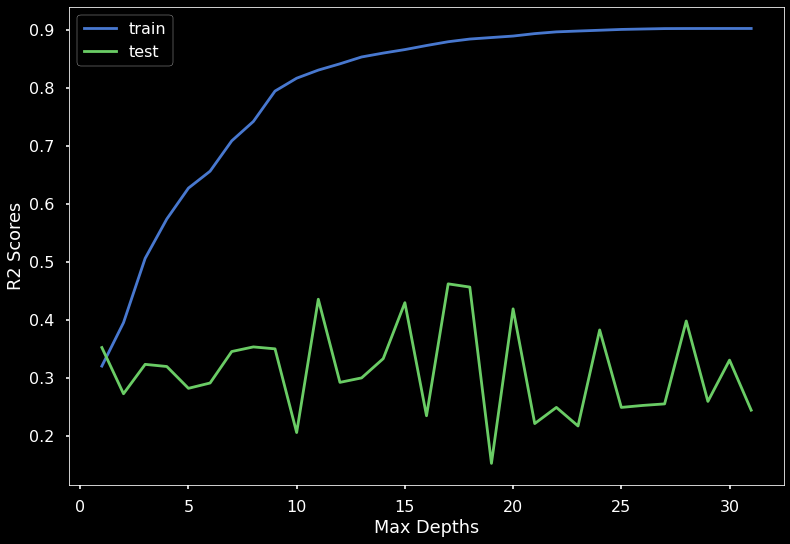

In [104]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

### Best Depth for Decision Tree Model

In [105]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

17

### Reevaluating Decision Tree Regressor Model

In [106]:
best_tree = DecisionTreeRegressor(random_state = 42, max_depth=best_depth)

best_tree_pipe = make_pipeline(preprocessor, best_tree)

best_tree_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
evaluate_model(y_train, best_tree_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for High Variance Decision Tree')
evaluate_model(y_test, best_tree_pipe.predict(X_test), split = 'testing')

Training Scores for High Variance Decision Tree
Results for training data:
  - R^2 = 0.879
  - MAE = 16077.327
  - MSE = 654876269.223
  - RMSE = 25590.55



Testing Scores for High Variance Decision Tree
Results for testing data:
  - R^2 = 0.462
  - MAE = 34610.985
  - MSE = 2517885802.26
  - RMSE = 50178.539



## Tuned (Max Depth) Decision Tree Model
- Tuning the max depth on the decision tree model improved the results for the testing data.
- One of the drawbacks to tuning your model is that it may perform more poorly on the training set. However, it usually will perfom better on the testing set.
- Here this model still has high bias even after tuning the max depth.
- We will try one more model to evaluate it's performance.

### Importing Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor

### Fitting a Random Forest Regressor Model

In [108]:
rf_tree_pipe = make_pipeline(preprocessor,RandomForestRegressor(random_state = 42))
rf_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
y_hat_train = rf_tree_pipe.predict(X_train)
y_hat_test = rf_tree_pipe.predict(X_test)

### Random Forest Regressor Model

In [109]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.826
  - MAE = 19619.327
  - MSE = 942424116.237
  - RMSE = 30698.927

Results for testing data:
  - R^2 = 0.56
  - MAE = 31872.362
  - MSE = 2061515521.69
  - RMSE = 45403.915



## Untuned Random Forest Model Observations
- Here, we see improved results as far as the regression metrics and the model's performance. 
- This model still has some bias. However, this model has improved performance on the testing set. 
- For the R^2 score 56.0% of the variance is explained.
- For the MAE the testing data is off by about $31,872.36. 

### Creating a Loop to Tune n_estimators for Random Forest Regressor Model

In [110]:
#create a range of max_depth values
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 2000, 3000, 4000, 5000]

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)

#loop over the values in depths
for n in n_estimators:
  #fit a new model with max_depth
  rf = RandomForestRegressor(random_state = 42, n_estimators=n)

  #put the model into a pipeline
  rf_pipe = make_pipeline(preprocessor, rf)
  
  #fit the model
  rf_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

### Plotting Scores for Random Forest Train & Test Visually

In [111]:
scores

,Train,Test
50,0.827453,0.563218
100,0.825894,0.559532
200,0.833013,0.558576
300,0.832843,0.555913
400,0.831502,0.555343
500,0.831412,0.555511
600,0.831391,0.556716
700,0.83171,0.556785
800,0.83189,0.555563
1000,0.831822,0.555858


### Best n_estimators for Random Forest Model

In [112]:
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators

50

### Reevaluating Random Forest Regressor Model

In [113]:
best_rf = RandomForestRegressor(random_state = 42, n_estimators=best_estimators)

best_rf_pipe = make_pipeline(preprocessor, best_rf)

best_rf_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
evaluate_model(y_train, best_rf_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for High Variance Decision Tree')
evaluate_model(y_test, best_rf_pipe.predict(X_test), split = 'testing')

Training Scores for High Variance Decision Tree
Results for training data:
  - R^2 = 0.827
  - MAE = 19626.979
  - MSE = 933983058.371
  - RMSE = 30561.136



Testing Scores for High Variance Decision Tree
Results for testing data:
  - R^2 = 0.563
  - MAE = 31998.943
  - MSE = 2044264641.827
  - RMSE = 45213.545



## Tuned (n_estimators) Random Forest Model Observations
- Here, we see the best results as far as the regression metrics and the model's performance. 
- This model still has some bias. However, this model has the best performance on the testing set. 
- For the R^2 score 56.3% of the variance is explained. 
- For the MAE the testing score is off by about $31,998.94

# Overall Recommendation

Data Science Insights
- For those who have an interst in Data Science:
  - Data Analytics Leads & Principal Data Engineers earn the most amount of money. However, this are usually not entry level careers and I would recommend going through a program, like Coding Dojo, where you can earn your data science certificate and then map out your career to these positions.

  - Data Engineers & Data Scientists have the most 100% remote positions. So, if you are wanting to work from home, or work from anywhere in the world, choosing one of the top five remote positions would be a good choice to build your career upon.
  
  - Lastly, the trend for the last three years show that data science and related fields are increasingly earning more money each year. So, choosing a career in one of these fields can be very lucrative.

Model Performance
- Overall, the best model is definitely the tuned Random Forest Regressor Model. There was still some bias in the model, but by far it outperformed the linear regression model. 